# Inteferometric Velocity Distribution 

Here we take a window function and move this over the range of the signal to recover velocity and amplitude graphs. This is spoke about in more depth in the report 

In [415]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, rfft, irfft, rfftfreq
from tqdm import tqdm 

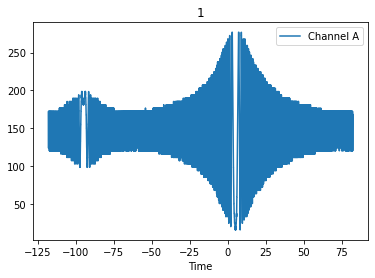

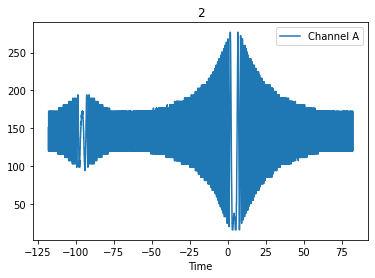

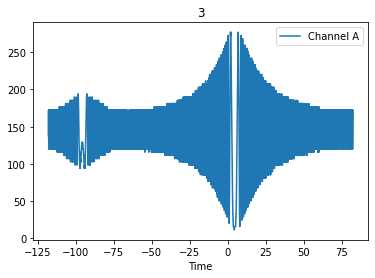

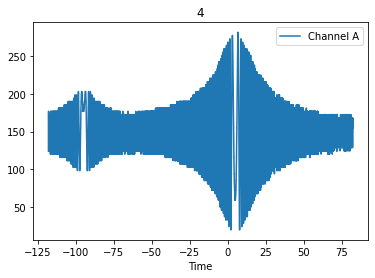

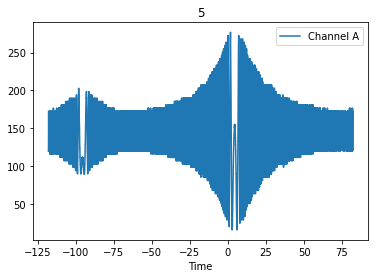

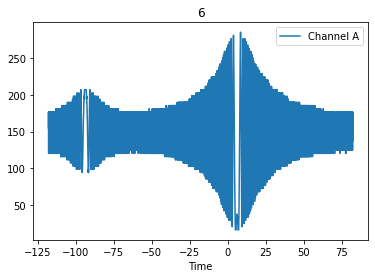

In [416]:
df = pd.read_csv('data/velocitydetection4/velocitydetection4_1.csv', skiprows=[1], index_col=0)
values = ['1','2','3','4','5','6']

for i in values:
    
    df = pd.read_csv(f'data/velocitydetection4/velocitydetection4_{str(i)}.csv', skiprows=[1], index_col=0)
    
    df.plot(title=i)

PicoScope will automatically take multiple snapshots, from here we pick the best one. 

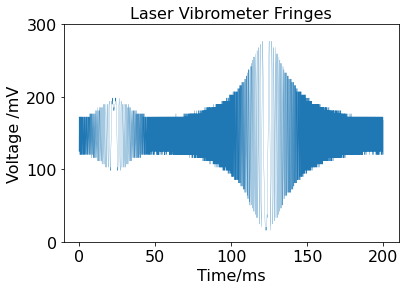

In [417]:
df = pd.read_csv('data/velocitydetection4/velocitydetection4_1.csv', skiprows=[1])
df['Time'] = df['Time'] + 118

plt.plot(df['Time'], df['Channel A'], linewidth=0.2)
plt.title('Laser Vibrometer Fringes', fontsize=16)
plt.ylabel('Voltage /mV', fontsize=16)
plt.xlabel('Time/ms', fontsize=16)
plt.xticks(np.arange(0, 210, step=50),fontsize=16)
plt.yticks(np.arange(0, 301, step=100),fontsize=16)
plt.show()

In [418]:
df = df/1000

df

,Time,Channel A
0,7.741500e-07,0.124576
1,2.125415e-05,0.137623
2,4.173414e-05,0.150655
3,6.221414e-05,0.163701
4,8.269414e-05,0.172399
...,...,...
9765,1.999880e-01,0.120228
9766,2.000085e-01,0.128925
9767,2.000289e-01,0.141957
9768,2.000494e-01,0.155004


Points have a gap of 0.0000204 seconds between them so so can convert to time

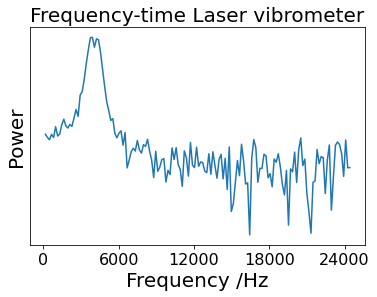

In [419]:
N = 300
SAMPLE_RATE = 1/0.00002047999999999206 # seconds


yf = rfft(list(df['Channel A'])[0:300]) # using rfft saves on compute 
Yf = np.abs(yf)
xf = rfftfreq(N, 1/SAMPLE_RATE)

plt.plot(xf[1:], np.log(np.abs(yf))[1:])
plt.title('Frequency-time Laser vibrometer', fontsize=20)
plt.ylabel('Power', fontsize=20)
plt.xlabel('Frequency /Hz', fontsize=20)
plt.xticks(np.arange(0, 24001, 6000),fontsize=16)
plt.yticks([],fontsize=16)
plt.show()

# this is an example of a single FFT, the v-t plot is just following the peak as a function of time 

In [511]:
x = np.linspace(0,9700,49)

# is there a prettier way of doing this convolution in real space 

def fft_lv_velocity(time, window_size, I, SAMPLE_RATE):

    zero = 1
    y = []
    n = len(x)


    for i in range(0,9700, 200):

        yf = rfft(list(I)[i:i+window_size]) # using rfft saves on compute 
        Yf = np.abs(yf)
        xf = rfftfreq(window_size, 1/SAMPLE_RATE)
        max_index = np.where(Yf[1:] == max(Yf[1:]))

        max_value = xf[max_index]

        if max_value == 0:
            zero = zero * -1

        y.append(zero * float(max_value))


    y = np.array(y)

    x_time = x * 1/SAMPLE_RATE 
        
    return y, x_time
        
y, x_time = fft_lv_velocity(x, 300, df['Channel A'], SAMPLE_RATE)

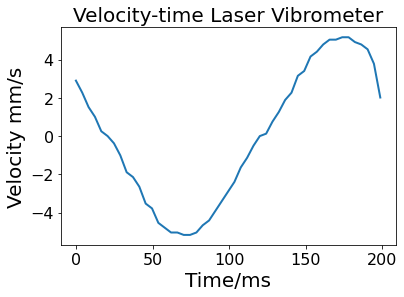

In [512]:
velocity = y * 1550e-9/2 * 1e3

plt.plot(x_time * 1e3, velocity, linewidth = 2) 
plt.title('Velocity-time Laser Vibrometer', fontsize=20)
plt.ylabel('Velocity mm/s', fontsize=20)
plt.xlabel('Time/ms', fontsize=20)
plt.xticks(np.arange(0, 210, step=50),fontsize=16)
plt.yticks(np.arange(-4, 4.1, step=2),fontsize=16)
plt.show()

#plt.savefig('photos/lv_vt.png', dpi='figure', bbox_inches="tight")

### Now try find amplitude using Riemann integral 

In [447]:
amplitude = [0] 

for i in range(len(velocity)):
    amplitude.append(amplitude[i] + velocity[i] * 0.02047999999999206)

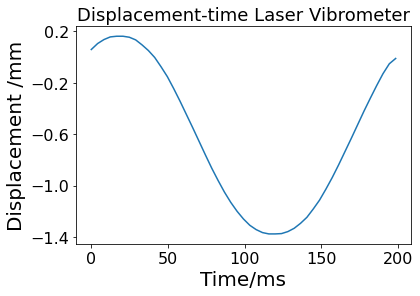

In [492]:
plt.plot(x * 0.02047999999999206, np.array(amplitude[1:]))
plt.title('Displacement-time Laser Vibrometer', fontsize=18)
plt.ylabel('Displacement /mm', fontsize=20)
plt.xlabel('Time/ms', fontsize=20)
plt.xticks(np.arange(0, 210, step=50), fontsize=16)
plt.yticks(np.arange(-1.4, 0.3, step=0.4), fontsize=16)
plt.show()

#plt.savefig('photos/lv_dt.png', bbox_inches="tight")

### What happens when the window is too large or too small?

We want our window to be large enough to capture a few cycles so a good estimate of frequency can be made but want it short enough that it is representative of the local frequency.

array([ 1.89208984,  1.89208984,  1.89208984,  1.89208984,  1.89208984,
        1.89208984,  1.89208984,  1.89208984,  1.89208984,  1.89208984,
        1.89208984,  1.89208984,  1.89208984, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -1.89208984,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.  

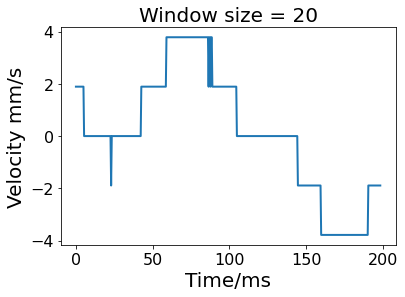

In [504]:
# to get this to work need to change the limtits for the range in fft_lv_velocity to match that of 'x'

# first try for small window of 20 
x = np.arange(0,9681, 20)
y, x_time = fft_lv_velocity(x, 20, df['Channel A'], SAMPLE_RATE)

velocity = y * 1550e-9/2 * 1e3

plt.plot(x_time * 1e3,velocity, linewidth = 2) 
plt.title('Window size = 20', fontsize=20)
plt.ylabel('Velocity mm/s', fontsize=20)
plt.xlabel('Time/ms', fontsize=20)
plt.xticks(np.arange(0, 210, step=50),fontsize=16)
plt.yticks(np.arange(-4, 4.1, step=2),fontsize=16)
#plt.show()
velocity
#plt.savefig('photos/lv_20.png', bbox_inches="tight")

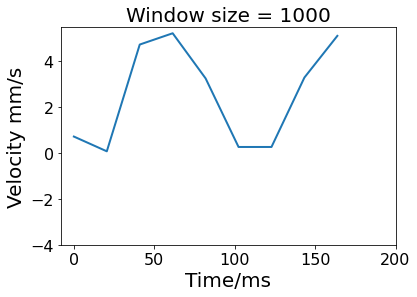

In [501]:
# second try for large windows of 1000
x = np.arange(0,8002,1000)
y, x_time = fft_lv_velocity(x, 1000, df['Channel A'], SAMPLE_RATE)

velocity = y * 1550e-9/2 * 1e3

plt.plot(x_time * 1e3,velocity, linewidth = 2) 
plt.title('Window size = 1000', fontsize=20)
plt.ylabel('Velocity mm/s', fontsize=20)
plt.xlabel('Time/ms', fontsize=20)
plt.xticks(np.arange(0, 210, step=50),fontsize=16)
plt.yticks(np.arange(-4, 4.1, step=2),fontsize=16)
#plt.show()

#plt.savefig('photos/lv_1000.png', bbox_inches="tight")